<a href="https://colab.research.google.com/github/JSJeong-me/SEMICON-BigData/blob/main/statistics-ref.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 통계적 가설검정

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

%precision 3
np.random.seed(1111)

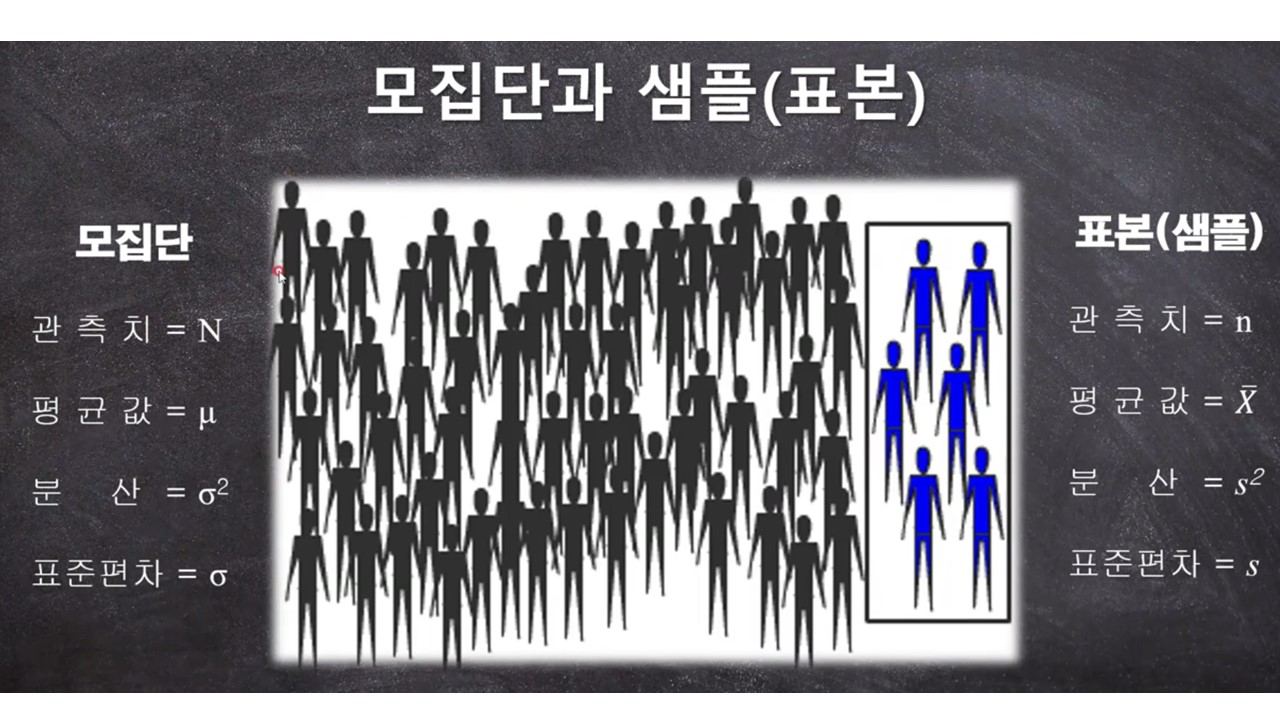

In [3]:
path = "./"

In [4]:
df = pd.read_csv(path+'ch11_potato.csv')
sample = np.array(df['무게'])
sample

array([122.02, 131.73, 130.6 , 131.82, 132.05, 126.12, 124.43, 132.89,
       122.79, 129.95, 126.14, 134.45, 127.64, 125.68])

In [5]:
s_mean = np.mean(sample)
s_mean

128.451

## 통계적 가설검정이란

### 통계적 가설검정의 흐름

In [ ]:
rv = stats.norm(130, np.sqrt(9/14))
rv.isf(0.95)

In [ ]:
z = (s_mean - 130) / np.sqrt(9/14)
z

In [ ]:
rv = stats.norm()
rv.isf(0.95)

In [ ]:
rv.cdf(z)

### 단측검정과 양측검정

In [ ]:
z = (s_mean - 130) / np.sqrt(9/14)
z

In [ ]:
rv = stats.norm()
rv.interval(0.95)

In [ ]:
rv.cdf(z) * 2

In [12]:
rv = stats.norm(130, 3)

In [13]:
c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14), 2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z < c:
        cnt += 1
cnt / n_samples

0.053

In [14]:
rv = stats.norm(128, 3)

In [15]:
c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14), 2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z >= c:
        cnt += 1
        
cnt / n_samples

0.197

## 가설검정

### 정규분포의 모평균에 대한 검정(모분산을 알고 있음)

In [ ]:
def pmean_test(sample, mean0, p_var, alpha=0.05):
    s_mean = np.mean(sample)
    n = len(sample)
    rv = stats.norm()
    interval = rv.interval(1-alpha)

    z = (s_mean - mean0) / np.sqrt(p_var/n)
    if interval[0] <= z <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if z < 0:
        p = rv.cdf(z) * 2
    else:
        p = (1 - rv.cdf(z)) * 2
    print(f'p값은 {p:.3f}')

In [ ]:
pmean_test(sample, 130, 9)

귀무가설을 채택
p값은 0.053


### 정규분포의 모분산에 대한 검정

In [ ]:
def pvar_test(sample, var0, alpha=0.05):
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.chi2(df=n-1)
    interval = rv.interval(1-alpha)
    
    y = (n-1) * u_var / var0
    if interval[0] <= y <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if y < rv.isf(0.5):
        p = rv.cdf(y) * 2
    else:
        p = (1 - rv.cdf(y)) * 2
    print(f'p값은 {p:.3f}')

In [ ]:
pvar_test(sample, 9)

귀무가설을 채택
p값은 0.085


### 정규분포의 모평균에 대한 검정(모분산을 알지 못함)

In [ ]:
def pmean_test(sample, mean0, alpha=0.05):
    s_mean = np.mean(sample)
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.t(df=n-1)
    interval = rv.interval(1-alpha)

    t = (s_mean - mean0) / np.sqrt(u_var/n)
    if interval[0] <= t <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if t < 0:
        p = rv.cdf(t) * 2
    else:
        p = (1 - rv.cdf(t)) * 2
    print(f'p값은 {p:.3f}')

In [ ]:
pmean_test(sample, 130)

귀무가설을 채택
p값은 0.169


In [ ]:
t, p = stats.ttest_1samp(sample, 130)
t, p

(-1.4551960206404198, 0.16933464230414275)

## 2표본 문제에 관한 가설검정

### 대응비교 t검정

In [ ]:
training_rel = pd.read_csv(path+'ch11_training_rel.csv')
print(training_rel.shape)
training_rel.head()

In [ ]:
training_rel['차'] = training_rel['후'] - training_rel['전']
training_rel.head()

In [ ]:
t, p = stats.ttest_1samp(training_rel['차'], 0)
p

In [ ]:
t, p = stats.ttest_rel(training_rel['후'], training_rel['전'])
p

### 독립비교 t검정

In [ ]:
training_ind = pd.read_csv(path+'/ch11_training_ind.csv')
print(training_ind.shape)
training_ind.head()

In [ ]:
t, p = stats.ttest_ind(training_ind['A'], training_ind['B'],
                       equal_var=False)
p

### 윌콕슨의 부호순위검정

In [ ]:
training_rel = pd.read_csv(path+'ch11_training_rel.csv')
toy_df = training_rel[:6].copy()
toy_df

In [ ]:
diff = toy_df['후'] - toy_df['전']
toy_df['차'] = diff
toy_df

In [ ]:
rank = stats.rankdata(abs(diff)).astype(int)
toy_df['순위'] = rank
toy_df

In [ ]:
r_minus = np.sum((diff < 0) * rank)
r_plus = np.sum((diff > 0) * rank)

r_minus, r_plus

In [ ]:
toy_df['후'] = toy_df['전'] + np.arange(1, 7)
diff = toy_df['후'] - toy_df['전']
rank = stats.rankdata(abs(diff)).astype(int)
toy_df['차'] = diff
toy_df['순위'] = rank
toy_df

In [ ]:
r_minus = np.sum((diff < 0) * rank)
r_plus = np.sum((diff > 0) * rank)

r_minus, r_plus

In [ ]:
toy_df['후'] = toy_df['전'] + [1, -2, -3, 4, 5, -6]
diff = toy_df['후'] - toy_df['전']
rank = stats.rankdata(abs(diff)).astype(int)
toy_df['차'] = diff
toy_df['순위'] = rank
toy_df

In [ ]:
r_minus = np.sum((diff < 0) * rank)
r_plus = np.sum((diff > 0) * rank)

r_minus, r_plus

In [ ]:
T, p = stats.wilcoxon(training_rel['전'], training_rel['후'])
p

In [ ]:
T, p = stats.wilcoxon(training_rel['후'] - training_rel['전'])
p

In [32]:
n = 10000
diffs = np.round(stats.norm(3, 4).rvs(size=(n, 20)))

In [ ]:
cnt = 0
alpha = 0.05
for diff in diffs:
    t, p = stats.ttest_1samp(diff, 0)
    if p < alpha:
        cnt += 1
cnt / n

In [ ]:
cnt = 0
alpha = 0.05
for diff in diffs:
    T, p = stats.wilcoxon(diff)
    if p < alpha:
        cnt += 1
cnt / n

### 만・위트니의 U검정

In [ ]:
training_ind = pd.read_csv('../data/ch11_training_ind.csv')
toy_df = training_ind[:5].copy()
toy_df

,A,B
0,47,49
1,50,52
2,37,54
3,60,48
4,39,51


In [ ]:
rank = stats.rankdata(np.concatenate([toy_df['A'],
                                      toy_df['B']]))
rank_df = pd.DataFrame({'A': rank[:5],
                        'B': rank[5:10]}).astype(int)
rank_df

,A,B
0,3,5
1,6,8
2,1,9
3,10,4
4,2,7


In [ ]:
n1 = len(rank_df['A'])
u = rank_df['A'].sum() - (n1*(n1+1))/2
u

7.0

In [ ]:
rank_df = pd.DataFrame(np.arange(1, 11).reshape(2, 5).T,
                       columns=['A', 'B'])
rank_df

,A,B
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


In [ ]:
u = rank_df['A'].sum() - (n1*(n1+1))/2
u

0.0

In [ ]:
rank_df = pd.DataFrame(np.arange(1, 11).reshape(2, 5)[::-1].T,
                       columns=['A', 'B'])
rank_df

,A,B
0,6,1
1,7,2
2,8,3
3,9,4
4,10,5


In [ ]:
u = rank_df['A'].sum() - (n1*(n1+1))/2
u

25.0

In [ ]:
u, p = stats.mannwhitneyu(training_ind['A'], training_ind['B'],
                          alternative='two-sided')
p

0.05948611166127324

### 카이제곱검정

In [ ]:
!pwd

In [37]:
ad_df = pd.read_csv(path+'data_chi.csv',  encoding='EUC-KR')

In [38]:
ad_df.index = ['1공장', '2공장', '3공장','4공장']

In [ ]:
n = len(ad_df)
print(n)
ad_df.head()

In [40]:
chi, pval, dof, expected = stats.chi2_contingency(ad_df)

In [41]:
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))
print( ' expected value: \n{}' .format(expected.round(3)))

chi-square test 
 chisq: 13.366
 p: 0.038
 degree pf freedom: 6
 expected value: 
[[258.333 258.333 258.333]
 [276.333 276.333 276.333]
 [230.667 230.667 230.667]
 [234.667 234.667 234.667]]


In [ ]:
ad_cross = pd.crosstab(ad_df['냉장고'], ad_df['세탁기'])
ad_cross

In [ ]:
ad_cross['했다'] / (ad_cross['했다'] + ad_cross['하지 않았다'])

In [ ]:
n_not, n_yes = ad_cross.sum()
n_not, n_yes

(900, 100)

In [ ]:
n_adA, n_adB = ad_cross.sum(axis=1)
n_adA, n_adB

(400, 600)

In [ ]:
ad_ef = pd.DataFrame({'했다': [n_adA * n_yes / n,
                              n_adB * n_yes / n],
                      '하지 않았다': [n_adA * n_not / n,
                                   n_adB * n_not / n]},
                      index=['A', 'B'])
ad_ef

,했다,하지 않았다
A,40.0,360.0
B,60.0,540.0


In [ ]:
y = ((ad_cross - ad_ef) ** 2 / ad_ef).sum().sum()
y

3.75

In [ ]:
rv = stats.chi2(1)
1 - rv.cdf(y)

0.052807511416113395

In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(ad_cross,
                                          correction=False)
chi2, p, dof

(3.75, 0.052807511416113395, 1)

In [ ]:
ef

array([[360.,  40.],
       [540.,  60.]])